# TODO
- pré processing avec sklearn
- labelling avec sklearn (donc subdivision en deux dataframe)
- Features reduction

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

On charge les données d'entraînement avec le fichier train.csv

In [4]:
data_app_train = pd.read_csv("./train.csv")
data_app_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


On vérifie si les classes sont bien répartit pour éviter les problèmes reliés à la non homogénéité des classes

In [5]:
data_app_train["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [6]:
data_app_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [19]:
data_app_train.groupby("price_range").mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


Text(0.5, 1.0, 'Largeur du téléphone')

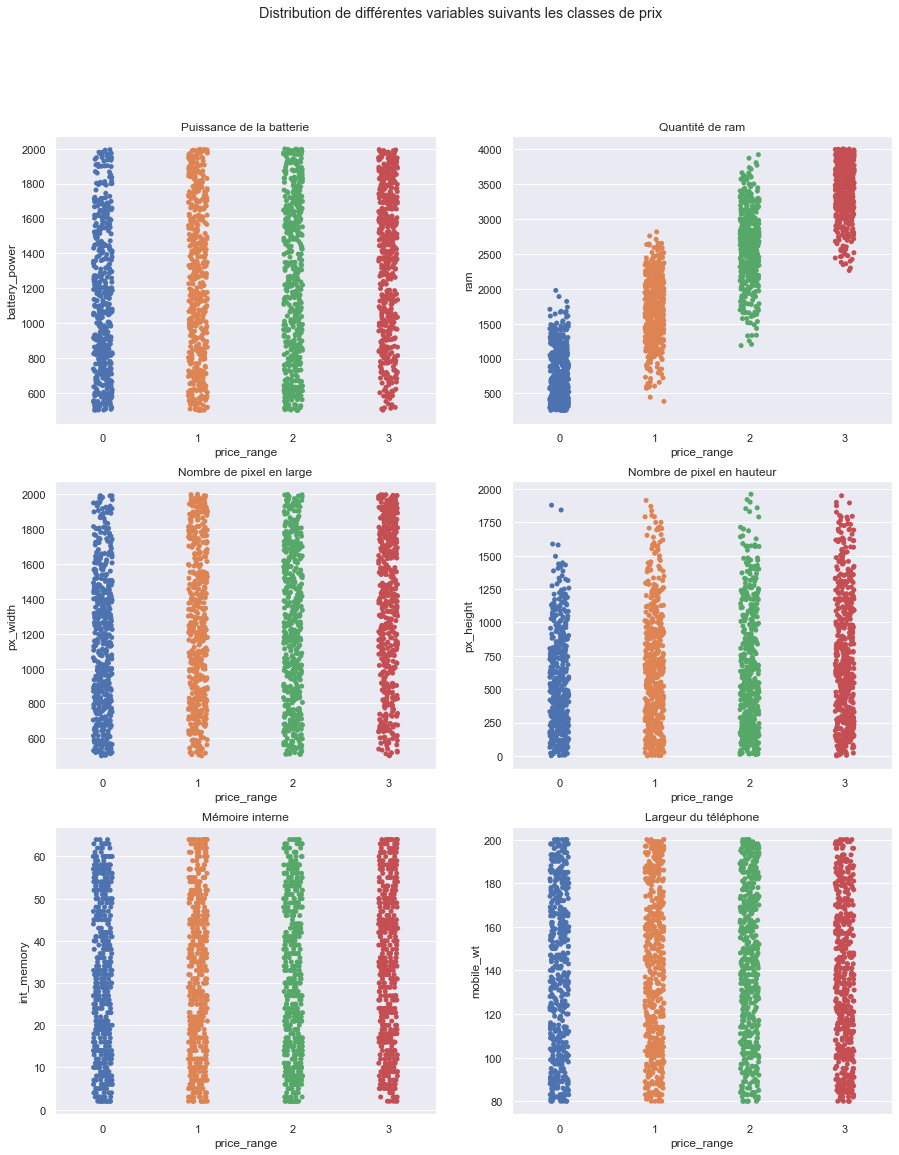

In [40]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribution de différentes variables suivants les classes de prix')

sns.stripplot(ax=axes[0, 0],data=data_app_train ,x='price_range', y='battery_power')
axes[0,0].set_title('Puissance de la batterie')

sns.stripplot(ax=axes[0, 1],data=data_app_train ,x='price_range', y='ram')
axes[0,1].set_title('Quantité de ram')

sns.stripplot(ax=axes[1,0],data=data_app_train ,x='price_range', y='px_width')
axes[1,0].set_title('Nombre de pixel en large')

sns.stripplot(ax=axes[1,1],data=data_app_train ,x='price_range', y='px_height')
axes[1,1].set_title('Nombre de pixel en hauteur')

sns.stripplot(ax=axes[2, 0],data=data_app_train ,x='price_range', y='int_memory')
axes[2,0].set_title('Mémoire interne')

sns.stripplot(ax=axes[2, 1],data=data_app_train ,x='price_range', y='mobile_wt')
axes[2, 1].set_title('Largeur du téléphone')

Text(0.5, 1.0, "Hauteur de l'écran")

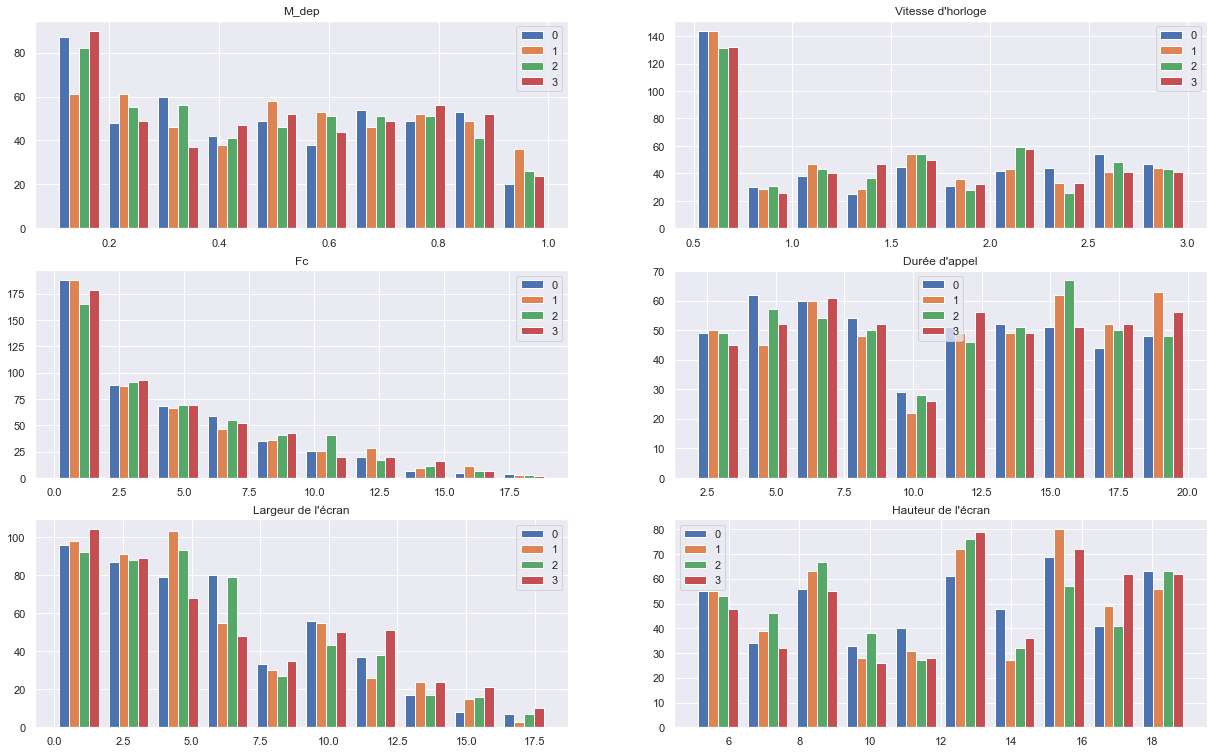

In [56]:
plt.figure(figsize=(21,13))
plt.subplot(3,2,1)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["m_dep"],
    data_app_train[data_app_train["price_range"]==1]["m_dep"],
    data_app_train[data_app_train["price_range"]==2]["m_dep"],
    data_app_train[data_app_train["price_range"]==3]["m_dep"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("M_dep")
plt.subplot(3,2,2)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["clock_speed"],
    data_app_train[data_app_train["price_range"]==1]["clock_speed"],
    data_app_train[data_app_train["price_range"]==2]["clock_speed"],
    data_app_train[data_app_train["price_range"]==3]["clock_speed"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Vitesse d'horloge")
plt.subplot(3,2,3)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["fc"],
    data_app_train[data_app_train["price_range"]==1]["fc"],
    data_app_train[data_app_train["price_range"]==2]["fc"],
    data_app_train[data_app_train["price_range"]==3]["fc"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Fc")
plt.subplot(3,2,4)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["talk_time"],
    data_app_train[data_app_train["price_range"]==1]["talk_time"],
    data_app_train[data_app_train["price_range"]==2]["talk_time"],
    data_app_train[data_app_train["price_range"]==3]["talk_time"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Durée d'appel")
plt.subplot(3,2,5)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["sc_w"],
    data_app_train[data_app_train["price_range"]==1]["sc_w"],
    data_app_train[data_app_train["price_range"]==2]["sc_w"],
    data_app_train[data_app_train["price_range"]==3]["sc_w"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Largeur de l'écran")
plt.subplot(3,2,6)
plt.hist([
    data_app_train[data_app_train["price_range"]==0]["sc_h"],
    data_app_train[data_app_train["price_range"]==1]["sc_h"],
    data_app_train[data_app_train["price_range"]==2]["sc_h"],
    data_app_train[data_app_train["price_range"]==3]["sc_h"]
], label=['0', '1', '2', '3'])
plt.legend()
plt.title("Hauteur de l'écran")

On passe maintenant au préprocessing des données d'entraînement pour l'utilisation de modèles de classification